In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
product = pd.read_csv('amazon_product.csv')

In [3]:
product.head(10)

,product_num,product_name,brand,shape,demention,width,height,volumn,material,price,Mo. Sales,D. Sales,rating_num,rating,ASIN,Link
0,3.0,Goodpick Large Cotton Rope Basket 15.8x15.8x13...,Goodpick,Round,15.80,NaN,13.80,342.3,Cotton Rope,19.74,4158.0,131.0,219.0,4.5,B07B2SW3HG,https://www.amazon.com/dp/B07B2SW3HG
1,63.0,Goodpick Large Cotton Rope Basket 15.8x15.8x13...,Goodpick,Kettle,15.80,NaN,13.80,342.3,Cotton Rope,19.74,4155.0,127.0,219.0,4.5,B07B2SW3HG,https://www.amazon.com/dp/B07B2SW3HG
2,1.0,INDRESSME XXXLarge Cotton Rope Basket 21.7 x 2...,INDRESSME,Round,21.70,NaN,13.80,470.2,Cotton Rope,29.97,3630.0,114.0,344.0,5,B07CLZBQ12,https://www.amazon.com/dp/B07CLZBQ12
3,77.0,TheWarmHome Decorative Basket Rectangular Fabr...,TheWarmHome,Box,15.70,11.8,8.30,1537.7,Cloth,14.99,3301.0,113.0,948.0,4.5,B01HPKJBKC,https://www.amazon.com/dp/B01HPKJBKC
4,42.0,Seville Classics WEB284 31.5 Foldable Storage ...,Seville Classics,Box,15.70,15.7,31.50,7764.4,Wood,39.73,3010.0,97.0,1987.0,4.5,B017WOF41G,https://www.amazon.com/dp/B017WOF41G
5,36.0,DII Collapsible Polyester Storage Basket or Bi...,DII,Box,17.75,12.0,15.00,3195.0,Cotton Rope,14.99,1983.0,68.0,1052.0,4.5,B01CH7TNRY,https://www.amazon.com/dp/B01CH7TNRY
6,100.0,Sorbus Storage Large Basket Set [3-Pack] - 15 ...,Sorbus,Box,15.00,10.0,9.00,1350.0,Cloth,20.99,1974.0,77.0,628.0,4.5,B079K89RPC,https://www.amazon.com/dp/B079K89RPC
7,5.0,BlueMake Woven Seagrass Belly Basket for Stora...,BlueMake,Kettle,8.60,NaN,7.87,106.3,Seaweed,9.99,1837.0,58.0,70.0,4.5,B07GW747M4,https://www.amazon.com/dp/B07GW747M4
8,15.0,OrganiHaus XXL Cotton Rope Basket | Wide 20 x ...,OrganiHaus,Round,20.00,NaN,13.30,417.6,Cotton Rope,27.99,1637.0,52.0,218.0,4.5,B07C7HQVCM,https://www.amazon.com/dp/B07C7HQVCM
9,30.0,Whitmor Rattique Storage Baskets Java Set of 3...,Whitmor,Box,11.40,14.6,6.50,1081.9,resin,20.99,1555.0,45.0,1044.0,4.5,B003VV2DQY,https://www.amazon.com/dp/B003VV2DQY


In [4]:
product.product_num.is_unique

False

In [5]:
product.material.value_counts()

Cotton Rope    70
Seaweed        14
Wicker          5
Cloth           3
Polyster        2
resin           2
Woven Paper     1
WIRE            1
Wood            1
Name: material, dtype: int64

In [6]:
product.material.isnull().any()

True

In [7]:
product.material.isnull().value_counts()

False    99
True      1
Name: material, dtype: int64

In [8]:
product = product.rename(columns={"shape": "shapes"})

In [9]:
product.columns

Index(['product_num', 'product_name', 'brand', 'shapes', 'demention', 'width',
       'height', 'volumn', 'material', 'price', 'Mo. Sales', 'D. Sales',
       'rating_num', 'rating', 'ASIN', 'Link'],
      dtype='object')

In [10]:
product.shapes.value_counts()

Round     66
Box       19
Kettle    11
Basket     3
Name: shapes, dtype: int64

In [11]:
product.groupby(['material']).shapes.value_counts(normalize=True)

material     shapes
Cloth        Box       1.000000
Cotton Rope  Round     0.885714
             Box       0.057143
             Kettle    0.057143
Polyster     Box       1.000000
Seaweed      Kettle    0.500000
             Round     0.214286
             Basket    0.142857
             Box       0.142857
WIRE         Round     1.000000
Wicker       Box       0.800000
             Basket    0.200000
Wood         Box       1.000000
Woven Paper  Box       1.000000
resin        Box       1.000000
Name: shapes, dtype: float64

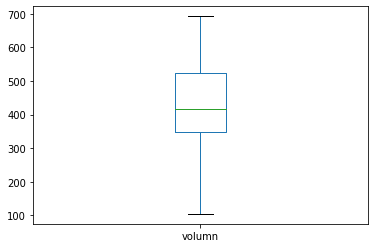

In [62]:
product.volumn.plot(kind='box', showfliers=False)
plt.show()

In [13]:
pd.cut(product.volumn, bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]).value_counts().sort_index()

(0, 1000]       80
(1000, 2000]    10
(2000, 3000]     0
(3000, 4000]     3
(4000, 5000]     2
(5000, 6000]     2
(6000, 7000]     1
(7000, 8000]     1
Name: volumn, dtype: int64

In [14]:
product_top21 = product.iloc[:21, :]

In [15]:
product_top21 = product_top21.rename(columns={"Mo. Sales": "mon_sales", "D. Sales": "day_sales"})

In [16]:
product_top21.head()

,product_num,product_name,brand,shapes,demention,width,height,volumn,material,price,mon_sales,day_sales,rating_num,rating,ASIN,Link
0,3.0,Goodpick Large Cotton Rope Basket 15.8x15.8x13...,Goodpick,Round,15.8,NaN,13.8,342.3,Cotton Rope,19.74,4158.0,131.0,219.0,4.5,B07B2SW3HG,https://www.amazon.com/dp/B07B2SW3HG
1,63.0,Goodpick Large Cotton Rope Basket 15.8x15.8x13...,Goodpick,Kettle,15.8,NaN,13.8,342.3,Cotton Rope,19.74,4155.0,127.0,219.0,4.5,B07B2SW3HG,https://www.amazon.com/dp/B07B2SW3HG
2,1.0,INDRESSME XXXLarge Cotton Rope Basket 21.7 x 2...,INDRESSME,Round,21.7,NaN,13.8,470.2,Cotton Rope,29.97,3630.0,114.0,344.0,5,B07CLZBQ12,https://www.amazon.com/dp/B07CLZBQ12
3,77.0,TheWarmHome Decorative Basket Rectangular Fabr...,TheWarmHome,Box,15.7,11.8,8.3,1537.7,Cloth,14.99,3301.0,113.0,948.0,4.5,B01HPKJBKC,https://www.amazon.com/dp/B01HPKJBKC
4,42.0,Seville Classics WEB284 31.5 Foldable Storage ...,Seville Classics,Box,15.7,15.7,31.5,7764.4,Wood,39.73,3010.0,97.0,1987.0,4.5,B017WOF41G,https://www.amazon.com/dp/B017WOF41G


In [17]:
product_top21.loc[:,['product_num', 'mon_sales']]

,product_num,mon_sales
0,3.0,4158.0
1,63.0,4155.0
2,1.0,3630.0
3,77.0,3301.0
4,42.0,3010.0
5,36.0,1983.0
6,100.0,1974.0
7,5.0,1837.0
8,15.0,1637.0
9,30.0,1555.0


In [18]:
(product_top21.price.max()-product_top21.price.min())/5

5.947999999999999

In [19]:
pd.cut(product_top21.price, bins=[0,5,10,15,20,25,30,35,40]).value_counts().sort_index()

(0, 5]      0
(5, 10]     1
(10, 15]    5
(15, 20]    3
(20, 25]    5
(25, 30]    3
(30, 35]    2
(35, 40]    2
Name: price, dtype: int64

In [20]:
product_top21.groupby('shapes').mon_sales.mean()

shapes
Box       1831.222222
Kettle    2253.333333
Round     1640.333333
Name: mon_sales, dtype: float64

In [32]:
price_for_A = product.loc[(product.price > 28) & (product.price < 32)]

In [34]:
price_for_A.shape

(24, 16)

In [46]:
price_for_A.head(24)

,product_num,product_name,brand,shapes,demention,width,height,volumn,material,price,mon_sales,day_sales,rating_num,rating,ASIN,Link
2,1.0,INDRESSME XXXLarge Cotton Rope Basket 21.7 x 2...,INDRESSME,Round,21.7,NaN,13.8,470.2,Cotton Rope,29.97,3630.0,114.0,344.0,5,B07CLZBQ12,https://www.amazon.com/dp/B07CLZBQ12
34,55.0,"Luxury Little Nursery Storage Basket, Size XXX...",luxury little,Round,17.0,NaN,15.0,400.4,Cotton Rope,29.99,540.0,18.0,128.0,5,B07NY9FL2H,https://www.amazon.com/dp/B07NY9FL2H
35,87.0,"Luxury Little Nursery Storage Basket, Size XXX...",luxury little,Round,22.0,NaN,14.0,483.6,Cotton Rope,29.99,539.0,17.0,128.0,5,B07NY9FL2H,https://www.amazon.com/dp/B07NY9FL2H
45,11.0,Extra Large Storage Basket - 22 X 22X 14 XXXL ...,RUNKA,Round,22.0,NaN,14.0,483.6,Cotton Rope,28.99,463.0,19.0,41.0,5,B07PQBXXHN,https://www.amazon.com/dp/B07PQBXXHN
46,13.0,MINTWOOD Design XXXL Extra Large 22 X 22 X 14 ...,MINTWOOD DESIGN,Round,22.0,NaN,14.0,483.6,Cotton Rope,28.95,448.0,33.0,18.0,4.5,B07PBXQNVD,https://www.amazon.com/dp/B07PBXQNVD
57,8.0,Everlove Large Blanket Basket Living Room - Wo...,Everlove,Round,20.0,NaN,13.0,408.2,Cotton Rope,29.99,289.0,11.0,33.0,5,B07PJ6KHY2,https://www.amazon.com/dp/B07PJ6KHY2
58,6.0,XXL Extra Large Cotton Rope Basket with Exclus...,alohaboho,Round,20.0,NaN,14.0,439.6,Cotton Rope,29.87,267.0,8.0,87.0,4.5,B07KNJRJXP,https://www.amazon.com/dp/B07KNJRJXP
59,91.0,Beautiful Woven Storage Basket by We Care Vida...,We Care Vida,Round,16.0,NaN,14.0,351.7,Cotton Rope,28.95,257.0,6.0,67.0,5,B07F5XTVRT,https://www.amazon.com/dp/B07F5XTVRT
62,83.0,Large Rope Storage Basket and Organizer Woven...,MI RISINGSTAR,Round,17.0,NaN,14.5,387.0,Cotton Rope,29.45,244.0,10.0,23.0,5,B07JX61M4T,https://www.amazon.com/dp/B07JX61M4T
64,20.0,Large Rope Storage Basket and Organizer Woven...,MI RISINGSTAR,Round,17.0,NaN,14.5,387.0,Cotton Rope,29.45,243.0,9.0,23.0,5,B07JX61M4T,https://www.amazon.com/dp/B07JX61M4T


In [38]:
print('product material for price range from 28 to 32 is', price_for_A.material.value_counts())

product material for price range from 28 to 32 is Cotton Rope    24
Name: material, dtype: int64


In [39]:
print('product shape for price range from 28 to 32 is', price_for_A.shapes.value_counts())

product shape for price range from 28 to 32 is Round    24
Name: shapes, dtype: int64


In [44]:
price_for_A = price_for_A.rename(columns={"Mo. Sales": "mon_sales", "D. Sales": "day_sales"})

In [45]:
print(price_for_A)

    product_num                                       product_name  \
2           1.0  INDRESSME XXXLarge Cotton Rope Basket 21.7 x 2...   
34         55.0  Luxury Little Nursery Storage Basket, Size XXX...   
35         87.0  Luxury Little Nursery Storage Basket, Size XXX...   
45         11.0  Extra Large Storage Basket - 22 X 22X 14 XXXL ...   
46         13.0  MINTWOOD Design XXXL Extra Large 22 X 22 X 14 ...   
57          8.0  Everlove Large Blanket Basket Living Room - Wo...   
58          6.0  XXL Extra Large Cotton Rope Basket with Exclus...   
59         91.0  Beautiful Woven Storage Basket by We Care Vida...   
62         83.0  Large Rope Storage Basket and Organizer  Woven...   
64         20.0  Large Rope Storage Basket and Organizer  Woven...   
66         85.0  Hamps XXL Woven Basket | Set of 2 Cotton Rope ...   
70         95.0  XXXLarge Cotton Rope Basket | Wide 22 x 22 x 1...   
72         40.0  XXXLarge Cotton Rope Basket - 22x22x14  Woven ...   
73        104.0  XXL

In [50]:
print('mean of monthly sales for product price range from 28 to 32 is', price_for_A.mon_sales.mean())

mean of monthly sales for product price range from 28 to 32 is 389.4166666666667


In [51]:
print('median of monthly sales for product price range from 28 to 32 is', price_for_A.mon_sales.median())

median of monthly sales for product price range from 28 to 32 is 214.0


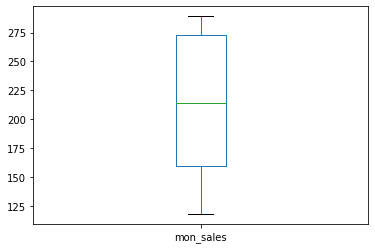

In [58]:
price_for_A.mon_sales.plot(kind='box', showfliers=False)
plt.show()

In [57]:
# According to dataform2, we have annual sales for product #1, and monthly sales for August was 3762, yearly sales was 35909.#
#avg.mon_sales was 2992. difference of #1 mon_sales between dataform1 and dataform2 was 3630:3762